![title](imagens/a1.jpg)

Previsão da ações do Google usando regressão linear

Obejtivo: Prever os melhores ações do Google

In [75]:
from platform import python_version

print('Versão python neste Jupyter Notebook:', python_version())

Versão python neste Jupyter Notebook: 3.7.4


In [78]:
import math
import random
import datetime
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_datareader as data_reader

from pandas.util.testing import assert_frame_equal
plt.style.use('fivethirtyeight')

In [79]:
%reload_ext watermark
%watermark -a "Rafael Gallo" --iversions

Author: Rafael Gallo

sys              : 3.7.4 (default, Aug  9 2019, 18:34:13) [MSC v.1915 64 bit (AMD64)]
plotly           : 4.14.1
seaborn          : 0.9.0
pandas           : 1.1.3
numpy            : 1.16.5
sklearn          : 0.23.2
matplotlib       : 3.1.1
pandas_datareader: 0.9.0



In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = data_reader.DataReader("GOOG", data_source = "yahoo")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2016-04-20,758.132019,750.010010,758.000000,752.669983,1529200,752.669983
2016-04-21,760.450012,749.549988,755.380005,759.140015,3060500,759.140015
2016-04-22,736.119995,713.609985,726.299988,718.770020,5951900,718.770020
2016-04-25,723.929993,715.590027,716.099976,723.150024,1959200,723.150024
2016-04-26,725.765991,703.026001,725.419983,708.140015,2744600,708.140015


In [4]:
df.shape

(1258, 6)

In [5]:
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-13,2277.209961,2256.090088,2261.469971,2267.270020,1165500,2267.270020
2021-04-14,2277.989990,2249.189941,2275.159912,2254.840088,1011000,2254.840088
2021-04-15,2306.596924,2266.000000,2276.979980,2296.659912,1373600,2296.659912
2021-04-16,2306.439941,2284.449951,2303.000000,2297.760010,1129800,2297.760010
2021-04-19,2318.449951,2287.844971,2291.979980,2302.399902,1233206,2302.399902


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2016-04-20 to 2021-04-19
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1258 non-null   float64
 1   Low        1258 non-null   float64
 2   Open       1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [7]:
df.dtypes

High         float64
Low          float64
Open         float64
Close        float64
Volume         int64
Adj Close    float64
dtype: object

In [8]:
df['Variation'] = df['Close'].sub(df['Open'])

In [9]:
corr = df.corr()
corr

,High,Low,Open,Close,Volume,Adj Close,Variation
High,1.000000,0.999199,0.999478,0.999412,0.011179,0.999412,0.062356
Low,0.999199,1.000000,0.999360,0.999485,-0.013875,0.999485,0.066286
Open,0.999478,0.999360,1.000000,0.998846,0.001640,0.998846,0.039740
Close,0.999412,0.999485,0.998846,1.000000,-0.003151,1.000000,0.087678
Volume,0.011179,-0.013875,0.001640,-0.003151,1.000000,-0.003151,-0.099596
Adj Close,0.999412,0.999485,0.998846,1.000000,-0.003151,1.000000,0.087678
Variation,0.062356,0.066286,0.039740,0.087678,-0.099596,0.087678,1.000000


In [10]:
df.describe()

,High,Low,Open,Close,Volume,Adj Close,Variation
count,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000
mean,1176.955008,1154.492028,1165.189172,1166.208596,1.627198e+06,1166.208596,1.019423
std,337.929055,328.783588,332.505661,333.527448,7.137645e+05,333.527448,16.029052
min,672.299988,663.283997,671.000000,668.260010,3.468000e+05,668.260010,-76.959839
25%,937.563751,926.149979,932.680023,932.277481,1.198375e+06,932.277481,-6.049988
50%,1127.390015,1103.642517,1116.094971,1115.585022,1.443750e+06,1115.585022,0.820038
75%,1316.500000,1297.950012,1305.535004,1310.742493,1.831675e+06,1310.742493,8.375000
max,2318.449951,2287.844971,2303.000000,2302.399902,6.207000e+06,2302.399902,72.610107


In [11]:
media = df.High.mean()
media

1176.955007920015

In [12]:
mediana = df.High.median()
mediana

1127.3900146484375

In [13]:
moda = df.High.mode()
moda

0    1200.0
dtype: float64

# Análise de dados

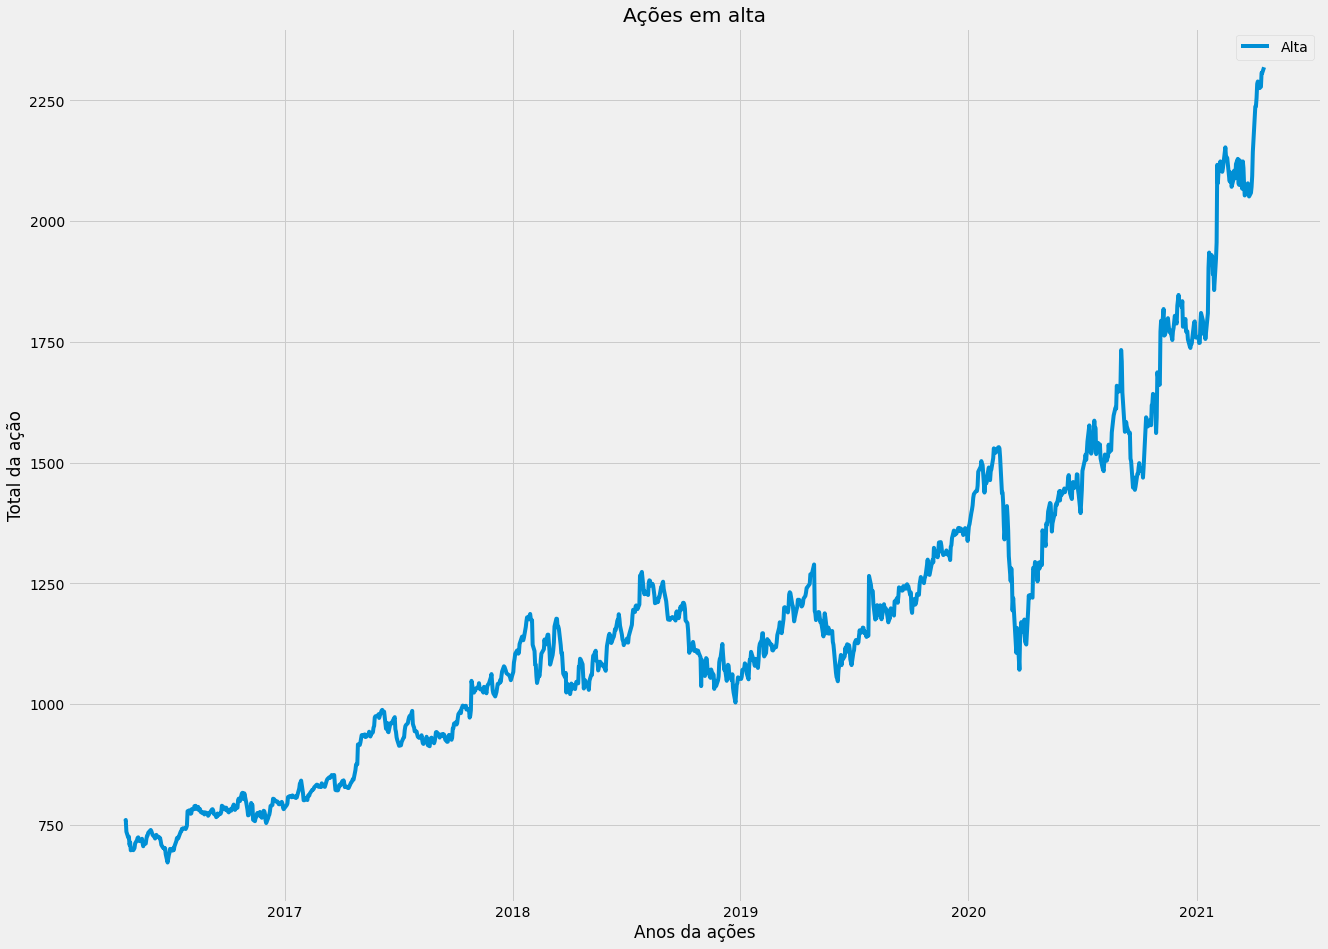

In [86]:
plt.figure(figsize=(20, 15))

plt.plot(df["High"])
plt.title("Ações em alta")
plt.xlabel("Anos da ações")
plt.ylabel("Total da ação")
plt.legend(["Alta"])
plt.show()

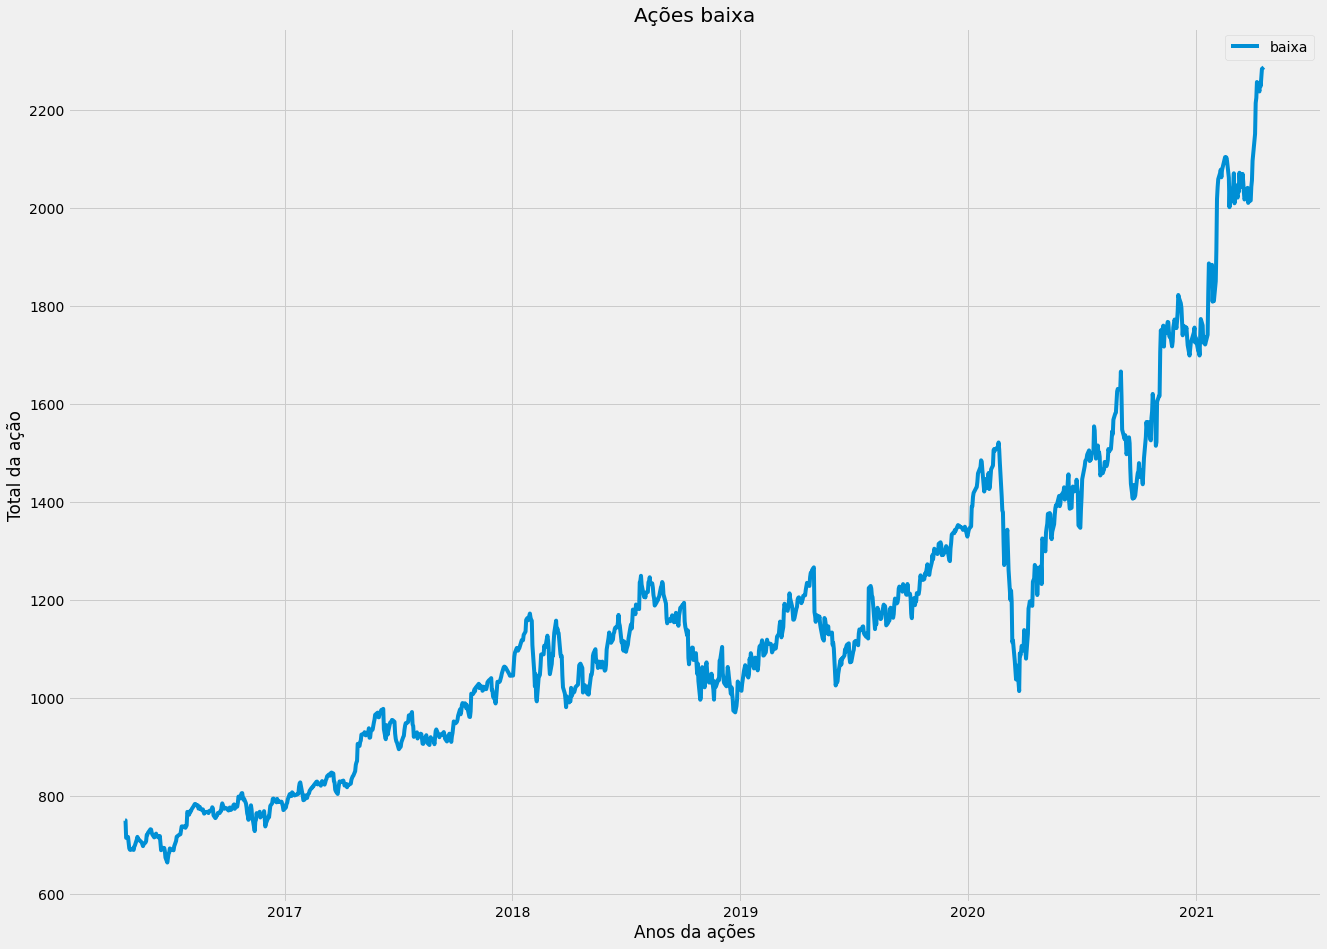

In [87]:
plt.figure(figsize=(20, 15))

plt.plot(df["Low"])
plt.title("Ações baixa")
plt.xlabel("Anos da ações")
plt.ylabel("Total da ação")
plt.legend(["baixa"])
plt.show()

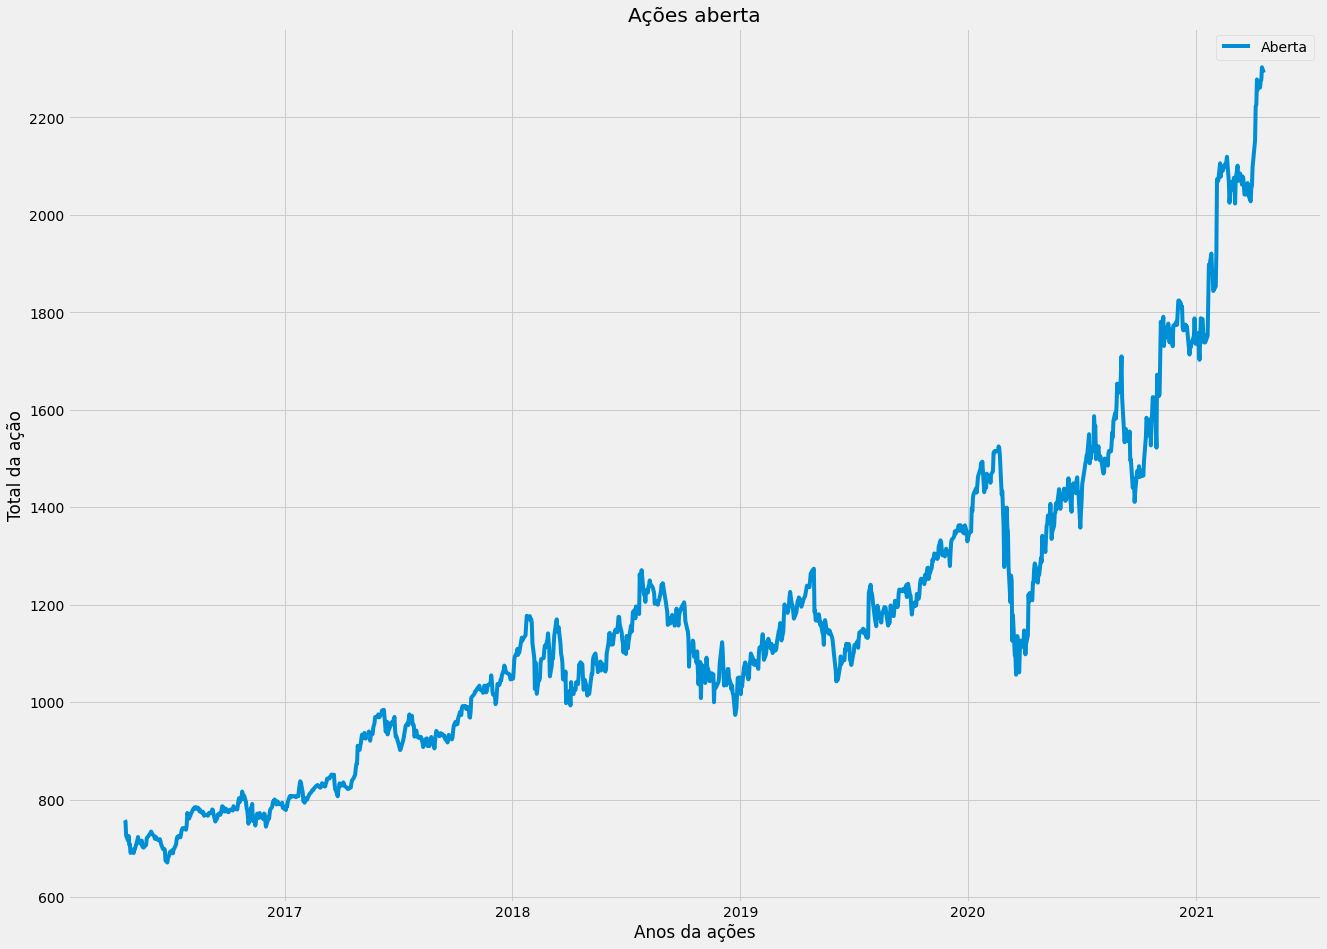

In [88]:
plt.figure(figsize=(20, 15))

plt.plot(df["Open"])
plt.title("Ações aberta")
plt.xlabel("Anos da ações")
plt.ylabel("Total da ação")
plt.legend(["Aberta"])
plt.show()

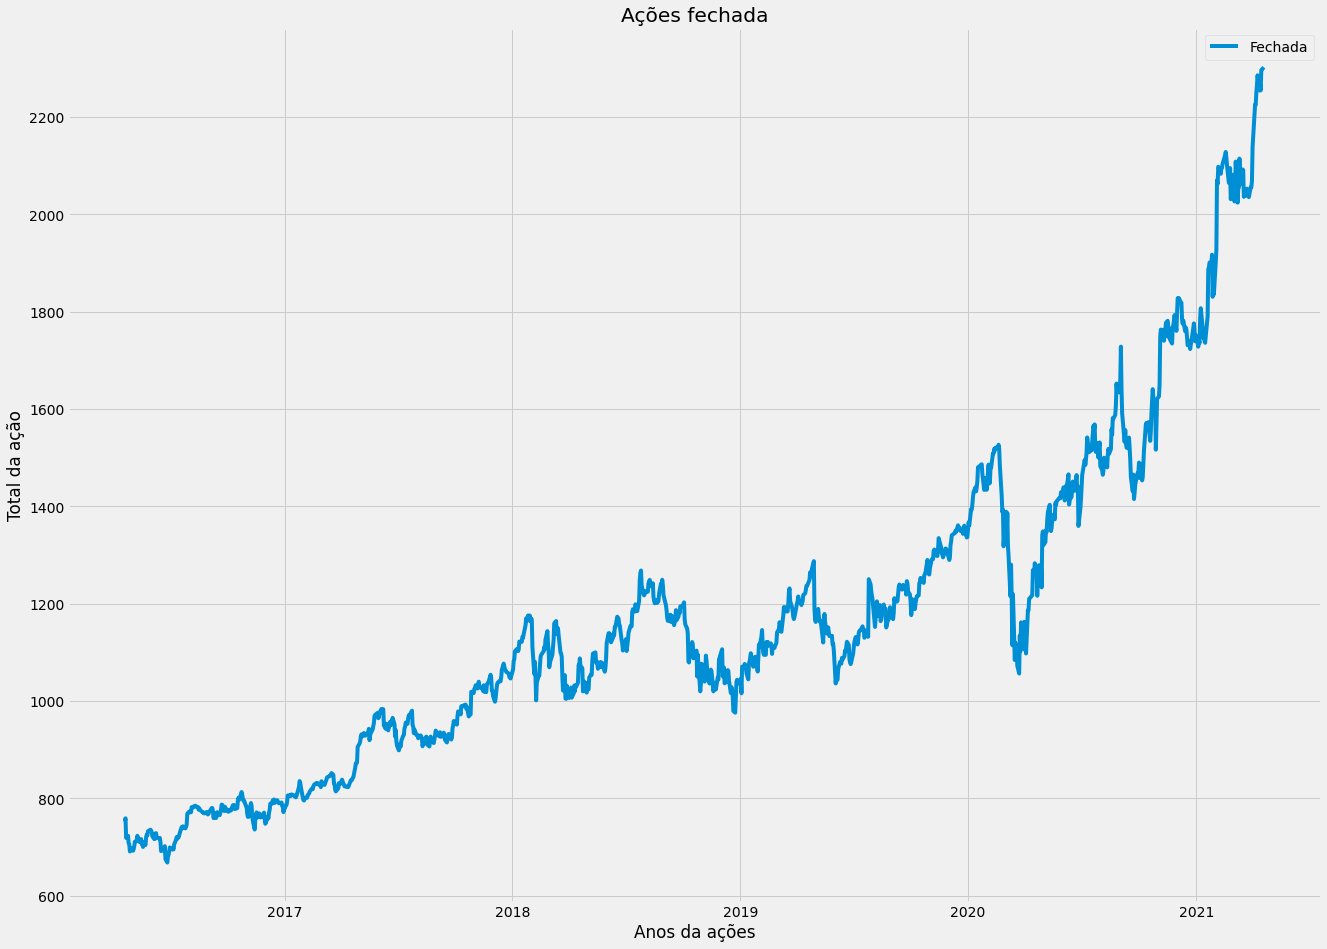

In [89]:
plt.figure(figsize=(20, 15))

plt.plot(df["Close"])
plt.title("Ações fechada")
plt.xlabel("Anos da ações")
plt.ylabel("Total da ação")
plt.legend(["Fechada"])
plt.show()

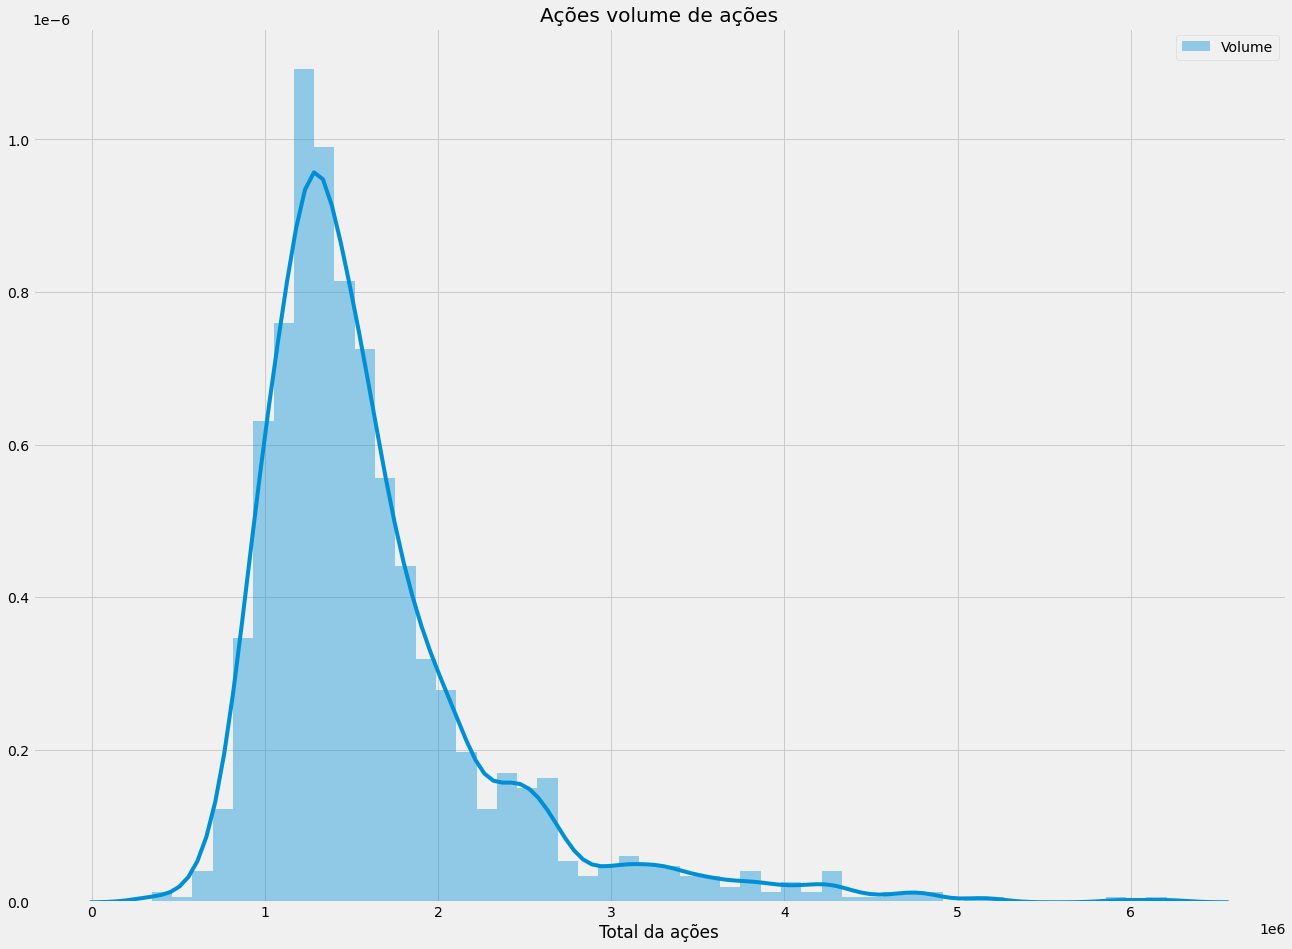

In [90]:
plt.figure(figsize=(20, 15))

ax = sns.distplot(df["Volume"])
plt.title("Ações volume de ações")
plt.xlabel("Total da ações")
plt.legend(["Volume"])
plt.show()


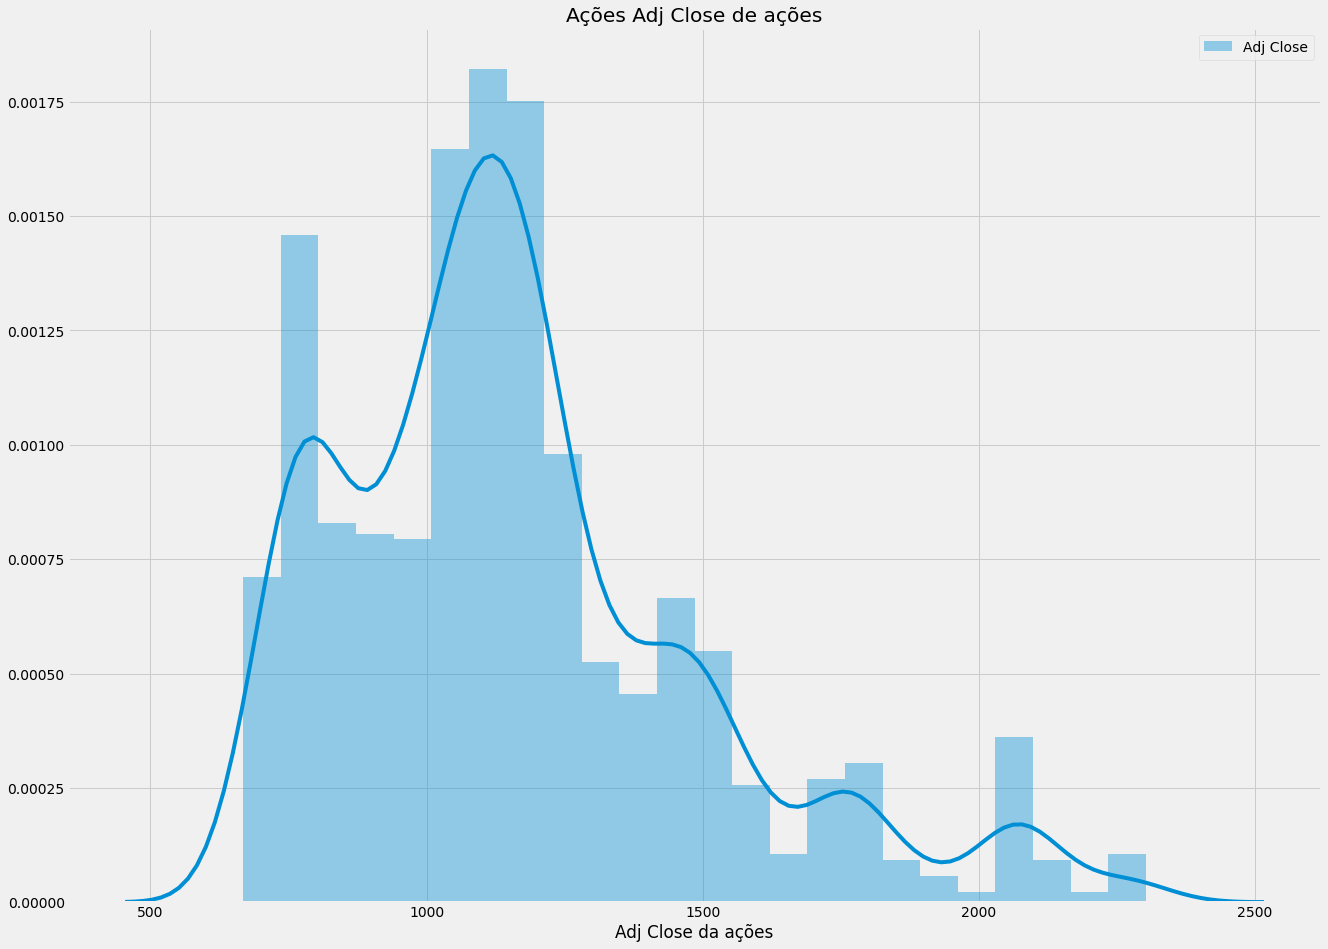

In [91]:
plt.figure(figsize=(20, 15))

ax = sns.distplot(df["Adj Close"])
plt.title("Ações Adj Close de ações")
plt.xlabel("Adj Close da ações")
plt.legend(["Adj Close"])
plt.show()

### Treino e Teste

In [21]:
x = df[["High", "Low", "Volume", "Open"]]
y = df["Close"]

In [22]:
x.shape

(1258, 4)

In [23]:
y.shape

(1258,)

In [24]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 0)

In [25]:
x_train.shape

(943, 4)

In [26]:
y_train.shape

(943,)

In [27]:
x_test.shape

(315, 4)

In [28]:
y_test.shape

(315,)

# Modelo de regressão linear

In [74]:
from sklearn.linear_model import LinearRegression

modelo_regreesao = LinearRegression()
modelo_regreesao_fit = modelo_regreesao.fit(x_train, y_train)
modelo_regreesao_pred = modelo_regreesao.predict(x_test)
print(modelo_regreesao_pred)

[ 697.27396728 1016.04355049  691.75604065 1118.1342123   810.17970156
  714.24266305  981.52574777 1028.91608     948.25018535 1263.53827263
 1163.45494683 1237.6762821  1354.92725326 1100.84420173 1192.1483154
 1550.59640532 1152.72402802 1759.45704273  775.72173874 1774.8355567
 1351.61649765  779.68011394 1120.33397082 1020.34363094 1727.7905159
  832.45808049 1235.27330241 1296.02952712 1066.03419064 1059.46410085
  765.40164994 1571.80904152 1608.80792305  693.29028399 1192.65836373
 1196.3601093  1136.28525874 1772.34334642 1097.68235362  925.55383327
  934.57543148 1740.49013553 1365.17541463 1757.93611373 1757.0936776
  754.78638171 2058.12952213 1144.32719853  790.85129602 2085.91371804
 1271.60678872  838.45935197 1301.44545591  702.40797166 1066.36102865
  923.01046444 1140.77638619 1435.1039641   721.28806383  759.08727846
  912.62346994 1722.88239121 1425.78009208 1168.04621008 1032.11176846
 1327.35861102 1515.98018963 1218.75844711 1445.97253851 1517.5218072
  760.91250

In [30]:
modelo_regreesao_score = modelo_regreesao.score(x_test, y_test)
modelo_regreesao_score

0.9994213062204651

In [31]:
modelo_regreesao.coef_

array([ 7.80077079e-01,  7.51766308e-01, -3.09712699e-07, -5.33161111e-01])

In [32]:
modelo_regreesao.intercept_

1.7774485306501902

In [49]:
pred = modelo_regreesao.predict(x_train)
y_pred = modelo_regreesao.predict(x_test)


In [35]:
y_test[:15]

Date
2016-04-27     705.840027
2018-04-06    1007.039978
2016-07-05     694.950012
2020-03-19    1115.290039
2017-01-13     807.880005
2016-05-16     716.489990
2017-07-24     980.340027
2018-05-01    1037.310059
2017-09-28     949.500000
2018-07-26    1268.329956
2018-09-19    1171.089966
2019-04-18    1236.369995
2019-12-18    1352.619995
2018-02-16    1094.800049
2019-04-01    1194.430054
Name: Close, dtype: float64

In [33]:
df_data = pd.DataFrame(y_test, modelo_regreesao_pred)
df_data_p = pd.DataFrame({"Previsão_da_ação": y_test, "Previsão":modelo_regreesao_pred})
df_data_p

,Previsão_da_ação,Previsão
Date,,
2016-04-27,705.840027,697.273967
2018-04-06,1007.039978,1016.043550
2016-07-05,694.950012,691.756041
2020-03-19,1115.290039,1118.134212
2017-01-13,807.880005,810.179702
...,...,...
2019-04-04,1215.000000,1212.063648
2020-04-14,1269.229980,1267.174504
2019-12-17,1355.119995,1355.247601


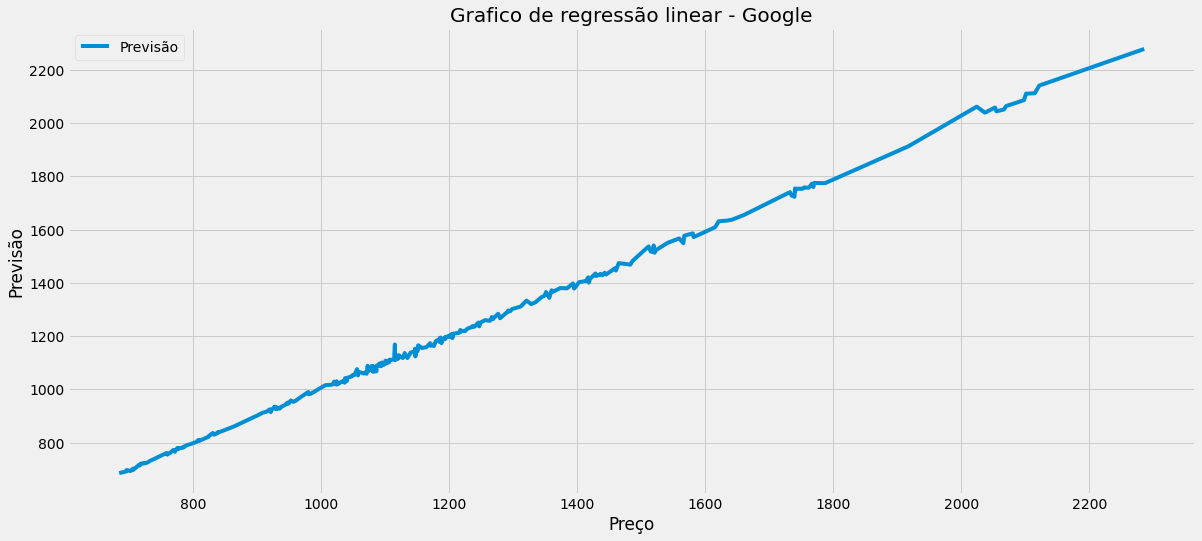

In [73]:
plt.figure(figsize=(18, 8))
sns.lineplot(x="Previsão_da_ação", y="Previsão", data = df_data_p)
plt.title("Grafico de regressão linear - Google", fontsize = 20)
plt.xlabel("Preço")
plt.ylabel("Previsão")
plt.legend(["Previsão"])
plt.show()

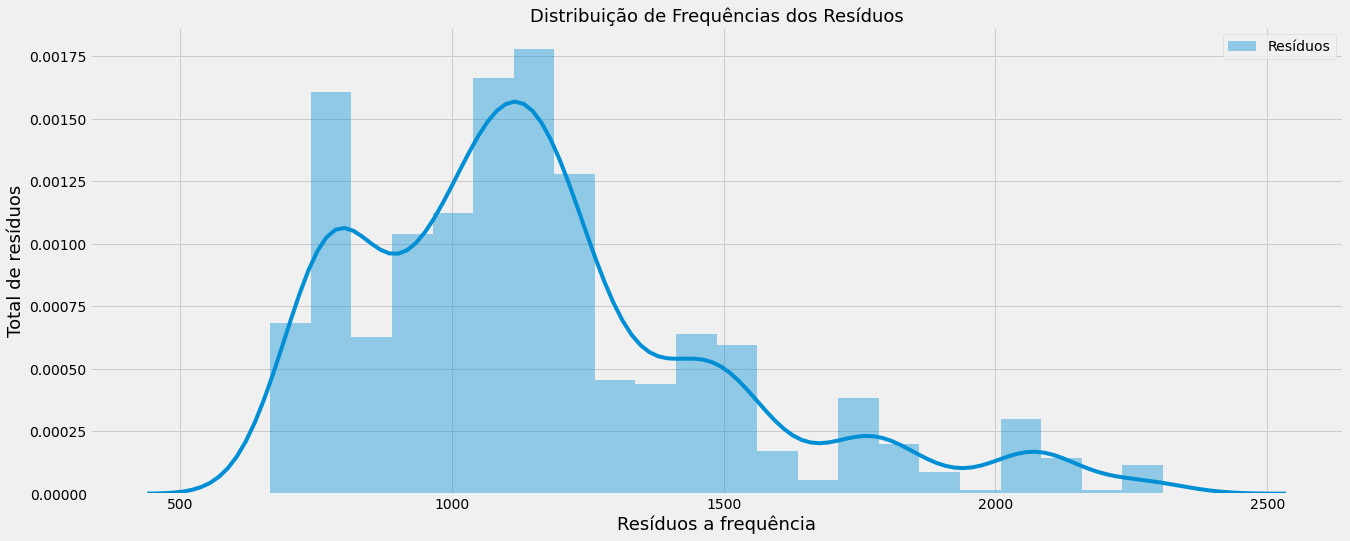

In [83]:
ax = sns.distplot(pred)
ax.figure.set_size_inches(20, 8)
ax.set_title('Distribuição de Frequências dos Resíduos', fontsize=18)
plt.ylabel("Total de resíduos", fontsize = 18)
plt.xlabel("Resíduos a frequência", fontsize = 18)
plt.legend(["Resíduos"])
plt.show()

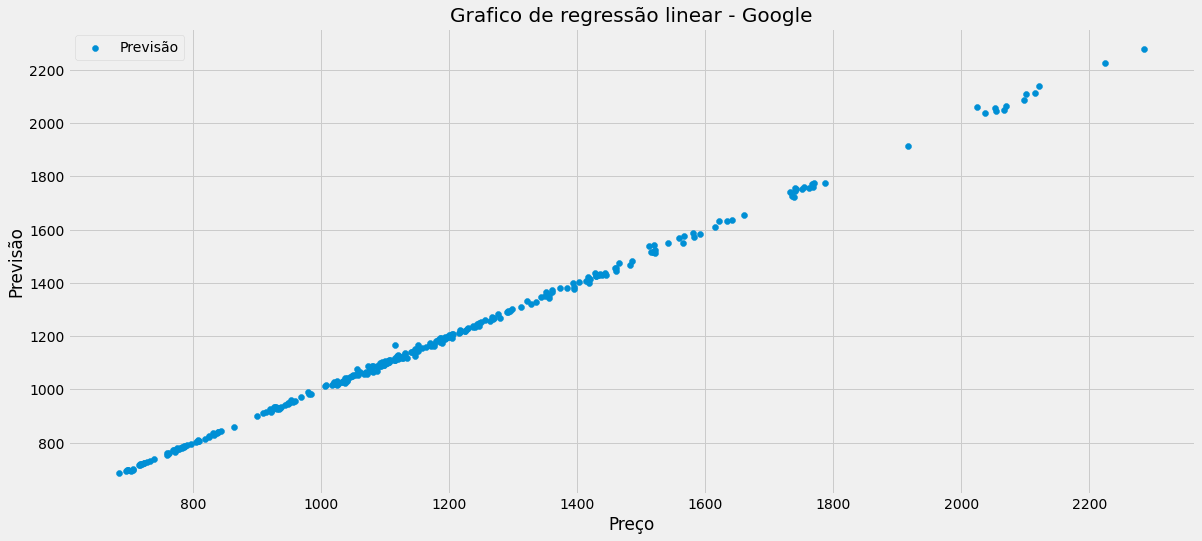

In [57]:
plt.figure(figsize=(18, 8))
plt.scatter(df_data_p.Previsão_da_ação, df_data_p.Previsão)
plt.title("Grafico de regressão linear - Google", fontsize = 20)
plt.xlabel("Preço")
plt.ylabel("Previsão")
plt.legend(["Previsão", "Preço"])
plt.show()

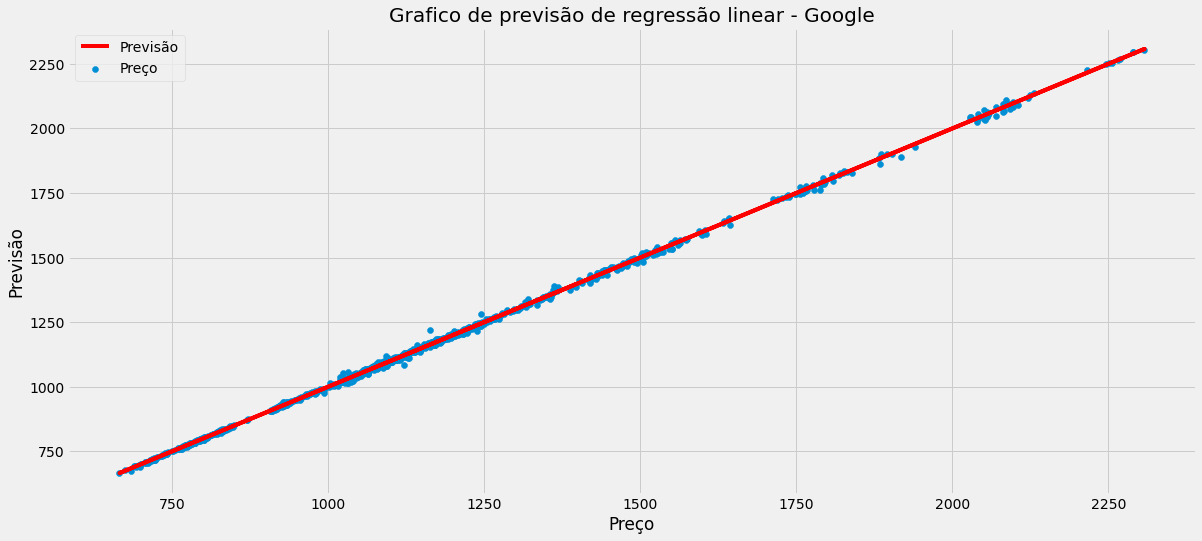

In [92]:
plt.figure(figsize=(18, 8))

plt.scatter(pred, y_train)
plt.plot(pred, modelo_regreesao.predict(x_train), color = "red")
plt.title("Grafico de previsão de regressão linear - Google", fontsize = 20)
plt.xlabel("Preço")
plt.ylabel("Previsão")
plt.legend(["Previsão", "Preço"])
plt.show()

In [93]:
# Metricas RMSE, MAE, MSE, r2

from math import sqrt
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

MSE = mean_squared_error(y_test, modelo_regreesao_pred)
MAE = mean_absolute_error(y_test, modelo_regreesao_pred)
r2 = r2_score(y_test, modelo_regreesao_pred)
RMSE = np.sqrt(mean_squared_error(y_test, modelo_regreesao_pred))

In [66]:
MSE

58.54819064375495

In [63]:
RMSE

7.651678942804314

In [64]:
MAE

5.333131040214685

In [61]:
r2

0.9994213062204651

In [67]:
### Salvando o modelo de Regressão linear

import pickle

with open('modelo_regreesao_pred.pkl', 'wb') as file:
    pickle.dump(modelo_regreesao_pred, file)